<a href="https://colab.research.google.com/github/drpetros11111/IBM_ML_Coursera/blob/IBM-KNN-Training/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Foundation

## Course 3, Part b: K-Nearest Neighbor LAB


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction and Learning Goals

In this lab, we will explore classification using the K-Nearest Neighbors approach. We will use a customer churn dataset from the telecom industry, which includes customer data such as long-distance usage, data usage, monthly revenue, types of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, includes several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data includes a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing. Then we will use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance.


In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

# Suppressing Warnings & Importing Libraries
This code snippet modifies the behavior of the warnings module and imports several Python libraries for data analysis and visualization. Let's break it down step by step:

**def warn(*args, **kwargs)**

**pass**

This defines a custom function called warn that takes any number of positional arguments **(*args)** and keyword arguments **(kwargs)**. In this case, the function does nothing (pass statement). This function will be used to override the default behavior of the warnings.warn function.
**bold text**
**import warnings**

This imports the warnings module, which is a Python built-in module for issuing warning messages.

**warnings.warn = warn**

This line assigns the warn function we defined earlier to the warnings.warn function. By doing this, any warning messages that would be displayed using warnings.warn will be suppressed and not shown.

By overriding the behavior of **warnings.warn** and suppressing warning messages, the code is likely aimed at preventing warning messages from being displayed during subsequent code execution. This can be useful when working on projects where certain warnings are expected or intentionally ignored.

**import pandas as pd**,

**numpy as np**,

**matplotlib.pyplot as plt**,

**os, sys, seaborn as sns**

 This imports several popular data analysis and visualization libraries in a concise manner. It imports pandas as pd, numpy as np, matplotlib.pyplot as plt, and seaborn as sns. Additionally, it imports the built-in libraries os and sys.

The imported libraries (pandas, numpy, matplotlib, os, sys, and seaborn) are commonly used in data analysis and visualization tasks. With these libraries available, you can leverage their functionalities to load, manipulate, analyze, and visualize data within your Python code.

---
###Note
The Python libraries **os and sys** are both built-in modules that provide functionality related to the operating system and system-specific functionalities. Here's a brief explanation of each library:

**os (Operating System Interface)**

The os module provides a way to interact with the operating system on which Python is running. It offers functions for tasks such as file and directory operations, process management, environment variables, path manipulation, and more. Some commonly used functions from the os module include **os.path.join(), os.listdir(), os.mkdir(), os.environ, and os.system()**.

**sys (System-Specific Parameters and Functions)**

The sys module provides access to some system-specific parameters and functions. **It allows interaction with the Python interpreter** and provides information about the runtime environment. This module is often used to handle command-line arguments, manipulate the Python runtime environment, and access system-related information. Some frequently used functions from the sys module include **sys.argv, sys.exit(), sys.platform, sys.stdin, and sys.stdout**.

**Both os and sys are versatile libraries that are used extensively in Python programming, especially for tasks involving file handling, directory operations, system calls, and managing runtime environments. They provide cross-platform functionality and allow Python programs to interact effectively with the underlying operating system.**


##1. Importing the Dataset

* We begin by importing the data. Examine the columns and data.
* Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.
* Begin by taking an initial look at the data, including both numeric and non-numeric features.


In [4]:
### Upload a csv file from a URL

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [5]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


##2. Perform EDA
###2.1. Perform Descritpive Statistics

In [6]:
round(df.describe(),2)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.43,0.42,0.24,0.29,0.34,0.34,0.29,0.67,0.38,0.59,...,0.39,0.05,0.23,0.43,0.22,0.07,0.12,0.06,0.09,0.11
std,0.40,0.49,0.24,0.45,0.48,0.48,0.45,0.47,0.42,0.49,...,0.49,0.23,0.42,0.50,0.41,0.26,0.32,0.24,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.25,0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.75,1.00,0.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


###2.2. Identify the dataset variables' types and their unique values

* Identify which:

 **variables are binary**,

 **categorical variables** that are **NOT binary and NOT ordinal**,

 **categorical WHICH ARE ordinal**, **AND**

 finally the **numeric ones.**

The non-numeric features will need to be **encoded** using methods we have discussed in the course.
* **Start by**:
identifying the number of unique values each variable takes, **THEN**

 create list variables for categorical, numeric, binary, and ordinal variables.

* **Note that **the variable 'months' can be treated as numeric**, but it may be more convenient to transform it to an ordinal variable.

* For the other categorical variables, examine their values to determine which may be encoded ordinally.


In [39]:
# Idetify unique values (counting, or a sort of summation, is done by the unique function) per column in the df dataframe
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3



####**Explanation of the 2.2.**
The given code snippet is using the pandas library to create a DataFrame named df_uniques. Let's break down the code step by step:

**[[i, len(df[i].unique())] for i in df.columns]**

This part of the code uses a list comprehension to
iterate over the columns of a DataFrame df.

**-For each column i, it creates a list containing two elements:**

The column name i and the number of unique values in that column, which is obtained by calling df[i].unique() and then calculating the length of the resulting array using len().

-The output is a list of lists, where each inner list contains the column name and the count of unique values for that column.

**columns=['Variable', 'Unique Values']**

This part specifies the column names for the resulting DataFrame.
-The first column is named 'Variable' and will contain the column names from the original DataFrame df.
-The second column is named 'Unique Values' and will contain the counts of unique values.

**.set_index('Variable')**

This method call sets the 'Variable' column as the index of the DataFrame df_uniques. This means that the 'Variable' column will be used as the row labels in the resulting DataFrame.

So, overall, the code creates a new DataFrame df_uniques that displays the unique value counts for each column in the original DataFrame df. The 'Variable' column contains the names of the columns, and the 'Unique Values' column contains the corresponding counts of unique values for each column. The resulting DataFrame has 'Variable' as its index.


---


**Note: Double Square Brackets**

In Python, the double square brackets **[[ ... ]]** represent a nested list. A nested list is a list that contains other lists as its elements.

In the context of the code snippet above,
**[[i, len(df[i].unique())]** **for i in df.columns**] is a list comprehension that creates a nested list.

**It iterates over the columns of the DataFrame df** and generates a list with two elements for each column.

T**he first element is i, which represents the column name**, and the **second element is len(df[i].unique())**, which represents the count of unique values in that column.

For example, if df has three columns ['A', 'B', 'C'], the list comprehension will generate a nested list like this:

**[
  ['A', unique_values_A],
  ['B', unique_values_B],
  ['C', unique_values_C]
]**

Here, unique_values_A, unique_values_B, and unique_values_C represent the counts of unique values in columns 'A', 'B', and 'C' respectively.

**The resulting nested list is then used to create a DataFrame using the pandas library, with 'Variable' and 'Unique Values' as column names**

###2.3 Identifying Binary Categorical Variables

In [8]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value',
 'payment_Credit Card',
 'payment_Mailed Check',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E']

###2.3. Explanation
The given code snippet **is selecting binary variables from a DataFrame df_uniques** based on a condition. Let's break down the code step by step:


---


**df_uniques['Unique Values'] == 2**

This part of the code checks a condition **for each row in the 'Unique Values' column** of the DataFrame df_uniques.

It returns a boolean Series where True indicates that the corresponding row has a value of 2 in the 'Unique Values' column and False otherwise.



---

**df_uniques[df_uniques['Unique Values'] == 2]**

This code uses the boolean Series as a filter to select rows from the DataFrame df_uniques. It returns a new DataFrame containing only the rows where the condition is True. In other words, it filters the DataFrame to include only the rows where the 'Unique Values' column has a value of 2.


---


**list(df_uniques[df_uniques['Unique Values'] == 2].index)**

This part retrieves the index values of the filtered DataFrame and converts them into a list. The index attribute of a DataFrame represents the row labels or the index values of the DataFrame. By applying the list() function, the index values are converted into a Python list.

Therefore, the overall purpose of the code is to identify binary variables from the DataFrame df_uniques. It looks for rows in df_uniques where the 'Unique Values' column has a value of 2, indicating that those variables have only  distinct values. The resulting list, stored in binary_variabletwos, contains the index values (column names) of the binary variables.



---


**index**

This accesses the index labels of the filtered rows.


---


**list(...)**

This converts the index values to a Python list.



---


---




**Note**

The reason for using df_uniques[df_uniques['Unique Values'] == 2] with double brackets is to perform boolean indexing in pandas.

In pandas, boolean indexing allows you to select specific rows from a DataFrame based on a boolean condition. The condition is applied to the DataFrame, resulting in a boolean Series where each element represents whether the corresponding row satisfies the condition or not.

In the given snippet, **df_uniques['Unique Values'] == 2 creates a boolean Series by comparing each value in the 'Unique Values' column of the DataFrame df_uniques** to the value 2.

The resulting boolean Series has True for rows where the condition is satisfied (i.e., where the 'Unique Values' column equals 2) and False for rows that do not satisfy the condition.

To select the rows that satisfy the condition, we use this boolean Series as an index for the DataFrame df_uniques. By enclosing df_uniques['Unique Values'] == 2 within the square brackets [], we use it as a filter to select only the rows of df_uniques where the condition is True.

**Thus, the expression df_uniques[df_uniques['Unique Values'] == 2] returns a new DataFrame that includes only the rows where the 'Unique Values' column has a value of 2. The double brackets are used to denote the boolean indexing operation and select the desired rows based on the condition**



```
# This is formatted as code
```

###2.4. Identifying Categorical variables that they are NOT Binary

In [9]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['months', 'contract', 'satisfaction']

###2.4. Eplanation
The given code snippet is selecting categorical variables from a DataFrame df_uniques based on certain conditions. Let's break it down step by step:

**(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)**
This part of the code creates a boolean Series by evaluating two conditions using logical operators. It checks if the values in the 'Unique Values' column of the DataFrame df_uniques satisfy both conditions: (1) they are greater than 2 and (2) they are less than or equal to 6. The result is a boolean Series where True indicates that the corresponding row satisfies both conditions, and False otherwise.

**df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)]**
This code uses the boolean Series as a filter to select rows from the DataFrame df_uniques. It returns a new DataFrame containing only the rows where both conditions are True. In other words, it filters the DataFrame to include only the rows where the 'Unique Values' column has a value greater than 2 and less than or equal to 6.

**list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)**
This part retrieves the index values (column names) of the filtered DataFrame and converts them into a list. The index attribute of a DataFrame represents the row labels or the index values of the DataFrame. By applying the list() function, the index values are converted into a Python list.

In summary, the code selects categorical variables from the DataFrame df_uniques based on specific conditions. It filters the DataFrame to include only the rows where the 'Unique Values' column has a value greater than 2 and less than or equal to 6. The resulting list, stored in categorical_variables, contains the index values (column names) of the categorical variables.

###2.5. Creating lists of Non-binary Categorical variables with their unique values

In [10]:
[[i, list(df[i].unique())] for i in categorical_variables]

[['months', [0.0, 0.25, 0.5, 1.0, 0.75]],
 ['contract', [0.0, 0.5, 1.0]],
 ['satisfaction', [0.5, 0.25, 0.0, 0.75, 1.0]]]


###2.5. Explanation
The code snippet **[[i, list(df[i].unique())] for i in categorical_variables]** uses a list comprehension to create a nested list that contains the column names and unique values of categorical variables in the DataFrame df. Let's break it down:


---


**[i, list(df[i].unique())]**

This part of the code creates an inner list for each categorical variable i in categorical_variables. Each inner list consists of two elements: the variable name i and a list of its unique values obtained by calling df[i].unique().


---


**for i in categorical_variables**

This loop iterates over each categorical variable i in the list categorical_variables.



---


**[[i, list(df[i].unique())] for i in categorical_variables]**

This is the list comprehension statement that combines the above two parts. It creates a nested list by iterating over each categorical variable in categorical_variables and generating the inner list for each variable.

Overall, the code generates a nested list that represents the categorical variables in the DataFrame df along with their unique values. Each inner list contains the variable name (column name) and a list of its unique values. The resulting nested list provides a summary of the categorical variables and their distinct values in the DataFrame.


---


---



**Note**
The use of double brackets **[[i, list(df[i].unique())]** **for i in categorical_variables]** in the given code snippet is related to the creation of a nested list using a list comprehension.

In Python, **double brackets [[ ... ]]** are used to create a nested list. A nested list is a list that contains other lists as its elements. It allows for a hierarchical structure where each inner list represents a separate entity within the outer list.

In the context of the code snippet above:

**[[i, list(df[i].unique())] for i in categorical_variables]**
This code uses a list comprehension to iterate over the categorical variables in the categorical_variables list. For each categorical variable i, it creates an inner list with two elements: the variable name i and a list of its unique values obtained by calling **df[i].unique()**.

The resulting list comprehension generates a nested list where each inner list represents a categorical variable along with its unique values. The outer list contains all these inner lists, providing a summary of the categorical variables and their corresponding unique values.

To summarize, **the double brackets [[ ... ]]** in the code snippet are used to indicate the creation of a nested list. Each inner list represents a categorical variable and its unique values, and the outer list contains all these inner lists, forming a hierarchical structure of categorical variables and their information.


###2.6. Defining Ordinal Categorical variables

In [11]:
ordinal_variables = ['contract', 'satisfaction']

In [12]:
df['months'].unique()

array([0.  , 0.25, 0.5 , 1.  , 0.75])

**It seems like we have a list of ordinal variables named 'contract' and 'satisfaction'.**

**Ordinal variables are variables that have a natural ordering or ranking associated with them.**

**In statistical analysis, they are often treated differently from nominal variables, which lack any inherent order.**

In the context of the given variables, 'contract' could represent different types of contracts, such as 'monthly', 'annual', or 'multi-year'. **These types of contracts can be ordered based on their duration or terms.**


---


**'Satisfaction' is a subjective measure that can be expressed on an ordinal scale.**

It might represent different levels of satisfaction, such as 'very dissatisfied,' 'somewhat dissatisfied,' 'neutral,' 'somewhat satisfied,' and 'very satisfied.' **These levels can be ranked based on the degree of satisfaction.**




---


---

**Note:**

**When working with ordinal variables, it's important to note that the numerical values assigned to the categories typically do not have a meaningful interpretation.**

Instead, the order or ranking of the categories is what matters. Statistical techniques designed for ordinal variables, such as ordinal regression or non-parametric tests, can be used to analyze them appropriately.

In [13]:
ordinal_variables.append('months')
df

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.00,0,0.000000,0,0,0,0,0,1.0,1,...,0,0,0,0,1,0,0,0,0,0
7039,0.25,1,0.282353,1,0,1,1,1,0.5,1,...,0,1,0,0,0,0,0,1,0,0
7040,1.00,1,0.694118,0,1,1,0,1,0.5,1,...,1,0,0,1,0,0,0,0,0,0
7041,0.00,0,0.200000,1,0,0,0,1,0.0,1,...,0,0,1,0,0,0,0,0,0,0


**In this code, the append() function is used to add the string 'months' to the ordinal_variables list.**

The subsequent code creates a DataFrame named 'df' with three columns: 'contract', 'satisfaction', and 'months'.

**The 'contract' and 'satisfaction' columns contain the previously defined ordinal variables, and the 'months' column contains the added variable, representing the duration in months for each contract type.**

###2.7. Identifying the numerical variables

In [14]:
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

###2.7. Explanation
The given code snippet **numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))** is used to identify the numeric variables in a DataFrame df based on the given sets of variables.

Let's break it down step by step:


---


**set(df.columns)**

This part retrieves a set of all the column names in the DataFrame df. The df.columns attribute returns a list of column names, and by applying set(), it is converted into a set to remove any duplicates.


---


**set(ordinal_variables)**

Here, the set of ordinal_variables is subtracted from the set of all column names. It removes the elements present in ordinal_variables from the set obtained in the previous step. This step eliminates the ordinal variables from consideration.


---


**set(categorical_variables)**

Similarly, the set of categorical_variables is subtracted from the result of the previous step. It removes the elements present in categorical_variables from the remaining set. This step eliminates the categorical variables from consideration.


---


**set(binary_variables)**
The set of binary_variables is subtracted from the result of the previous step. It removes the elements present in binary_variables from the remaining set. This step eliminates the binary variables from consideration.

**list(...)**

**Finally, the resulting set is converted back to a list using the list() function, storing it in the numeric_variables variable.**

The numeric_variables list contains the column names of the variables that are not present in ordinal_variables, categorical_variables, or binary_variables. Thus, it represents the numeric variables present in the DataFrame df.

**In summary, the code snippet creates a list numeric_variables by finding the column names of the numeric variables in the DataFrame df. It excludes the column names from the sets ordinal_variables, categorical_variables, and binary_variables.**




---


---
**Note:**

In Python, both sets and lists are used to store collections of elements. However, there are several key differences between sets and lists in terms of their properties and usage. Here are the main differences:

In Python, both sets and lists are used to store collections of elements. However, there are several key differences between sets and lists in terms of their properties and usage. Here are the main differences:

**Ordering**

**Lists** are ordered collections, meaning they maintain the order of elements as they are added.

On the other hand, sets are unordered collections, which means they do not preserve the order of elements.

**Duplicates**

Lists allow duplicate elements, meaning you can have multiple occurrences of the same element in a list.

Sets, however, do not allow duplicates. Each element in a set is unique, and duplicate elements are automatically removed.

**Mutability**

Lists are mutable, which means you can modify, add, or remove elements from a list after it is created. Sets are also mutable.

You can add or remove elements from a set. However, sets themselves are not mutable, meaning you cannot change individual elements within a set.


---


**Membership and Lookup**

Sets provide a faster membership and lookup operation compared to lists. Checking if an element is in a set is an O(1) constant time operation, while in a list, it is an O(n) linear time operation.

In Python, the append() operation for a list has a time complexity of O(n), where n is the number of elements in the list. **This means that as the size of the list grows, the time taken to perform the append operation also increases linearly.**

**On the other hand, adding a column to a DataFrame in pandas using the dictionary-based approach, as shown in the previous code example, has a time complexity of O(1).**

This is because adding a new column to a DataFrame does not involve iterating over the existing elements. Instead, it directly assigns the new column as a key-value pair in the underlying dictionary structure of the DataFrame.

So, when adding elements to a list, the time complexity is linear (O(n)), while adding columns to a pandas DataFrame has a constant time complexity (O(1)).

---


**Operations**

Sets have built-in support for mathematical set operations like union, intersection, and difference. Lists do not have these built-in operations but can be manipulated using various list methods and operations.



---



**Syntax**

Sets are defined using curly braces {}, or by using the set() constructor. Lists are defined using square brackets [], or by using the list() constructor.



---



**In summary, sets are unordered collections of unique elements, optimized for membership and uniqueness operations. Lists are ordered collections that allow duplicates and provide more flexibility for modifying and accessing elements. The choice between using a set or a list depends on the specific requirements of your program and the nature of the data you need to store and manipulate.**

###2.8. Plottig Numerical Values to identify their distributions -plotting histograms

array([[<Axes: title={'center': 'monthly'}>,
        <Axes: title={'center': 'gb_mon'}>]], dtype=object)

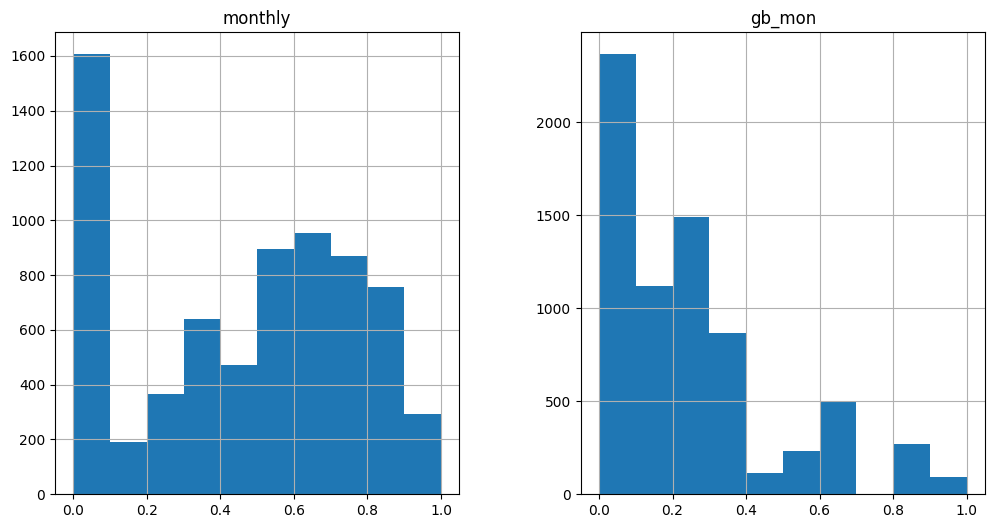

In [15]:
df[numeric_variables].hist(figsize=(12, 6))

### 2.8. Converting the numerical column into a Categorical variable with specific intervals or bins

In [16]:
df['months'] = pd.cut(df['months'], bins=5)

###**2.8. Explanation**
The code snippet **df['months'] = pd.cut(df['months'], bins=5)** is used to convert a numerical column named 'months' in a DataFrame df into categorical intervals or bins.



---



Let's break down the code:

**df['months']**

This part selects the column named 'months' from the DataFrame df. It represents the column containing numerical values that you want to convert into categorical intervals.



---



**pd.cut(...)**

The pd.cut() function from the pandas library is used to cut the selected column into specified bins or intervals.



---



**df['months'], bins=5**

Here, the resulting categorical intervals are assigned back to the column 'months' in the DataFrame df. The parameter bins=5 specifies that the column should be divided into 5 equal-width bins or intervals.



---


The **pd.cut()** function assigns each value in the 'months' column to the corresponding interval based on its value. The intervals are created such that they divide the range of the column's values into equal-width bins. Each bin represents a specific range of values, and the values in the 'months' column are mapped to the corresponding bin based on their value.

For example, if the 'months' column originally had values ranging from 0 to 50, the **pd.cut() function would divide this range into 5 equal-width bins, such as [0-10), [10-20), [20-30), [30-40), and [40-50).** Each value in the 'months' column would then be assigned to the respective bin based on its value.

**By assigning the resulting categorical intervals back to the 'months' column in the DataFrame df, you are effectively converting the numerical column into a categorical variable with specific intervals or bins.**

Note that the specific binning strategy and interval range may vary based on the data and the parameters you provide to the pd.cut() function

## 3. Perform variable Encoding & Scalling
* Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
* Scale the data using one of the scaling methods discussed in the course.
* Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'


In [17]:
#Import the Labelling & Encoding Libraries
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

The code snippet **from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder imports three different classes from the sklearn.preprocessing module in scikit-learn**. Let's look at each class:



---
**LabelBinarizer**

LabelBinarizer is a class in scikit-learn used for **binarizing (or one-hot encoding) Non-Binary Categorical features.** It converts categorical data into a binary matrix representation, where each category becomes a binary feature column. This is useful when dealing with classification tasks or when the presence or absence of a category is significant.



---



**LabelEncoder**

LabelEncoder is a class that encodes categorical labels with integer values. **It assigns a unique integer to each unique label in the dataset, transforming categorical labels into numerical representations.**

The LabelEncoder is commonly used for **encoding nominal or categorical data**. It is a utility class in the scikit-learn library that transforms categorical labels into numerical labels.

The LabelEncoder works by assigning a unique numerical value to each unique category or label in the nominal variable. This encoding allows machine learning algorithms to work with categorical variables, as most algorithms are designed to handle numerical data.
This is commonly used when dealing with classification tasks or when categorical labels need to be converted to numerical format for model training.

---

**OrdinalEncoder**

OrdinalEncoder is a class used to encode categorical features into ordinal integers. **It maps each unique category to a numerical value based on the order of appearance.** It is suitable for features where the order or rank among the categories matters, such as low, medium, high or small, medium, large. It can be useful when working with certain types of categorical data in machine learning models.

**By importing these classes, you can use them to preprocess categorical data before feeding it into machine learning models. Each class provides different functionalities for encoding categorical data, allowing you to choose the appropriate method based on the specific requirements of your task.**

###3.1 Encode & Fit.Transform the Categorical Variables

In [18]:
#Create the Objects of the Encoders

lb, le = LabelBinarizer(), LabelEncoder()

**In the code snippet provided, we are instantiating the LabelBinarizer and LabelEncoder classes by creating instances of these classes using the respective constructors.**

When you instantiate a class, you create an object of that class, which allows you to access the methods and attributes defined within the class. By creating instances of LabelBinarizer and LabelEncoder, you can use the methods and functionalities provided by these classes.

For example, after instantiating the LabelBinarizer class with lb = LabelBinarizer(), you can use the fit_transform() method of lb to perform one-hot encoding on the nominal variables in the DataFrame.

Similarly, after instantiating the LabelEncoder class with le = LabelEncoder(), you can use the fit_transform() method of le to encode the ordinal variables with numerical labels.

By creating separate instances, you can apply the desired encoding technique to the respective variables in your DataFrame.





Regenerate response

In [19]:
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

In this code, each column specified in the ordinal_variables list is transformed using the **fit_transform() method of the LabelEncoder**. The transformed values are then assigned back to the corresponding column in the DataFrame df.

After running this code, the ordinal variables in the DataFrame will be encoded with numerical labels, allowing you to use them in machine learning models or other statistical analyses that require numerical inputs.

In [20]:
df[ordinal_variables].astype('category').describe()

,contract,satisfaction,months
count,7043,7043,7043
unique,3,5,5
top,0,2,0
freq,3610,2665,2470


The code snippet **df[ordinal_variables].astype('category').describe()** applies the describe() method to a subset of columns in a DataFrame df that are specified by ordinal_variables. Here's a breakdown of the code:

**df**

This assumes that df is the name of your DataFrame.

**ordinal_variables**

This refers to a list of column names in the DataFrame df that contain ordinal categorical variables.

**df[ordinal_variables]**

This selects a subset of the DataFrame df by indexing with ordinal_variables. It retrieves only the columns specified in ordinal_variables.

**.astype('category')**

This converts the selected columns to the 'category' data type. By using the .astype() method with the argument 'category', the selected columns are converted to the categorical data type.

**.describe()**

This applies the describe() method to the subset of categorical columns. The describe() method provides summary statistics of the categorical data, including count, unique categories, most frequent category, and frequency of the most frequent category.

**By chaining these operations together, df[ordinal_variables].astype('category').describe() generates summary statistics for the selected ordinal categorical variables in the DataFrame. The resulting output will display information about the number of non-null values, the number of unique categories, the most frequent category, and its frequency for each column in ordinal_variables.**

Note that the describe() method works on categorical data, providing statistical summaries that are appropriate for this data type

The output from the snippet **df[ordinal_variables].astype('category').describe() provides a summary of the selected ordinal categorical variables in the DataFrame.** Let's break down the output:


---


**contract column**

**count**

This indicates the number of non-null values in the "contract" column, which is 7043.

**unique**

This shows the number of unique categories or levels in the "contract" column, **which is 3**.

**top**

This displays the most frequently occurring category in the "contract" column, which is "0".

**freq**

This represents the frequency or count of the most frequent category in the "contract" column, which is 3610.

---
**satisfaction column**

**count**

This indicates the number of non-null values in the "satisfaction" column, which is 7043.

**unique**

This shows the number of unique categories or levels in the "satisfaction" column, which is 5.

**top**

This displays the most frequently occurring category in the "satisfaction" column, which is "2".

**freq**

This represents the frequency or count of the most frequent category in the "satisfaction" column, which is 2665.


---


**months column**

**count**

This indicates the number of non-null values in the "months" column, which is 7043.

**unique**

This shows the number of unique categories or levels in the "months" column, which is 5.

**top**

This displays the most frequently occurring category in the "months" column, which is "0".

**freq**

This represents the frequency or count of the most frequent category in the "months" column, which is 2470.



---


**In summary, the output provides basic descriptive statistics for each of the selected ordinal categorical variables. It includes the count of non-null values, the number of unique categories, the most frequent category, and the frequency of the most frequent category in each column. This summary helps to understand the distribution and characteristics of the ordinal categorical variables in the DataFrame.**

In [21]:
# Transforming the binary categorical variables

for column in binary_variables:
    df[column] = lb.fit_transform(df[column])


In [22]:
# Calculating the Non-binary categorical & non-ordinal variables
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))

In [23]:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

The code snippet **df = pd.get_dummies(df, columns=categorical_variables, drop_first=True) uses the pd.get_dummies() function from the Pandas library to perform one-hot encoding on the categorical variables specified in the categorical_variables list.** Let's break it down step by step:

**df**

This assumes that df is the name of your DataFrame.

categorical_variables: This refers to a list of column names in the DataFrame df that contain categorical variables.

**pd.get_dummies()**

This function is used to perform one-hot encoding on categorical variables. It creates dummy variables for each unique category in the specified columns.

**columns=categorical_variables**

This parameter specifies the columns in the DataFrame that should be one-hot encoded. It takes the categorical_variables list as its value.

**drop_first=True**

This parameter controls whether to drop the first category when creating dummy variables. Setting it to True drops the first category, resulting in k-1 dummy variables for k categories in each column. This helps avoid multicollinearity in certain modeling scenarios.

Let's dive deeper into the concept of multicollinearity and how dropping the first category when creating dummy variables can help mitigate it.

When working with categorical variables in regression models, they need to be transformed into numerical form. One common approach is to use dummy variable encoding, where each category is represented by a separate binary column (dummy variable). However, including all categories as dummy variables can lead to multicollinearity issues.

**Multicollinearity occurs when there is a high correlation or linear dependency between predictor variables in a regression model. In the case of including all categories as dummy variables, perfect multicollinearity can arise. This happens because the values of the dummy variables are not independent; their values can be perfectly predicted by the values of the remaining dummy variables in the same column.**

To mitigate multicollinearity, the **"dummy variable trap" or "reference category" approach is commonly used**. In this approach, one category is excluded as the reference or baseline category, and dummy variables are created for the remaining categories. By dropping the first category, we create k-1 dummy variables for k categories.

Dropping the first category helps to avoid perfect multicollinearity because it removes the redundant information captured by having all categories as dummy variables. It ensures that the values of the dummy variables in each column are not perfectly predictable or linearly dependent on each other.

The drop_first parameter in scikit-learn's OneHotEncoder allows you to implement this approach. By setting drop_first=True, the first category for each feature is dropped when creating the dummy variables, resulting in k-1 dummy variables for k categories.

By using this parameter, you are effectively excluding one category as a reference, reducing multicollinearity and ensuring that the dummy variables are more independent and informative in your regression model.
**By calling pd.get_dummies(df, columns=categorical_variables, drop_first=True),**

The function creates new columns in the DataFrame df for each unique category in the specified categorical variables. The original categorical columns are replaced with the new one-hot encoded columns.

The resulting DataFrame df will have additional columns containing the one-hot encoded representation of the categorical variables. Each category in the original columns is converted into a separate binary column, with a value of 1 indicating the presence of that

---

category and 0 indicating its absence.

Let's walk through an example to illustrate how the "dummy variable trap" or "reference category" approach helps mitigate multicollinearity.

Suppose we have a categorical variable called "Color" with three categories: "Red," "Blue," and "Green." If we were to encode this variable using dummy variables without dropping the first category, the resulting columns would be:


**Color_Red ---  Color_Blue ---  Color_Green**

      1               0                0

      0               1                0

      0               0                1

Here, we have included all three categories as dummy variables. However, notice that the sum of the values across the columns for each row is always equal to 1. This is because only one color can be present at a time.

The problem with including all categories is that it introduces perfect multicollinearity. The values in each column can be perfectly predicted from the values in the other columns. For example, if we know that Color_Red and Color_Blue are both 0, we can automatically infer that Color_Green must be 1.

To avoid this issue, we apply the **"dummy variable trap"** or **"reference category"** approach by dropping the first category, which becomes the reference or baseline. Let's drop the "Red" category:


**Color_Blue   ---  Color_Green**

    0               0

    1               0

    0               1

By dropping the first category, we now have two dummy variables, Color_Blue and Color_Green. Note that in each row, only one of the variables is 1, and the other is 0.

This approach helps mitigate multicollinearity because the dropped category's information is captured implicitly in the intercept or constant term of the regression model. Including all categories as dummy variables would lead to a perfect linear dependency among them, making it difficult to estimate the effects of individual categories accurately.

By excluding one category as a reference, we ensure that the dummy variables are more independent and provide meaningful information without introducing multicollinearity issues in the regression model.



---


---


**Note that the original categorical columns are dropped from the DataFrame if drop_first=True is specified.**

If you want to keep the original columns alongside the one-hot encoded columns, you can set drop_first=False or omit the drop_first parameter (as it defaults to False).

###3.2. Perform Descriptive Statistics on the Categorical Variables

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,1.734204,1.592924,0.0,0.000000,1.000000,3.000000,4.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.754792,0.848468,0.0,0.000000,0.000000,2.000000,2.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


The .T attribute is used to transpose the resulting DataFrame, switching the rows and columns. This operation converts the column-wise statistics generated by describe() into row-wise statistics.


###3.3. Perform Scalling

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

**The Min-Max scaling technique is being applied to both the ordinal_variables and numeric_variables in the DataFrame df. The variables in these lists are iterated over**, and each column is transformed using the fit_transform() method of the MinMaxScaler class, represented by mm in the code.

**The purpose of using Min-Max scaling in this code snippet could be to normalize the values of both ordinal and numeric variables to a specific range, typically between 0 and 1. This normalization ensures that all the variables are on a comparable scale and can potentially improve the performance of certain models or analyses.**

**By applying Min-Max scaling, the values of each column in df[column] are transformed to a range between 0 and 1** based on the minimum and maximum values of that column. This allows for relative comparisons between the values within each column.

For example, if you have a numeric variable representing income with a wide range (e.g., $10,000   

to

$1,000,000)

and an ordinal variable representing satisfaction levels ranging from 1 to 5, Min-Max scaling would bring both variables to a comparable scale between 0 and 1.


---



---


**This normalization can help ensure that the magnitude of one variable does not dominate the analysis or modeling process compared to the other.**

In [40]:
for column in [ordinal_variables + numeric_variables]:
    df[column] = mm.fit_transform(df[column])

The code snippet for column in

**[ordinal_variables + numeric_variables]:**

**df[column] = mm.fit_transform(df[column])**

performs feature scaling on the columns specified in the ordinal_variables and numeric_variables lists using a MinMaxScaler object.


---

Let's break it down step by step:

**ordinal_variables and numeric_variables:**

These are assumed to be lists containing column names of the ordinal and numeric variables, respectively.



---

**for column in [ordinal_variables + numeric_variables]:**

This loop iterates over a list containing the combined ordinal and numeric variables.



---



**df[column]**

This accesses the column(s) in the DataFrame df specified by column.



---



**mm.fit_transform(df[column])**

This applies the **fit_transform() method of the MinMaxScaler** object mm to scale the values of the selected column(s).



---





**fit_transform()**

calculates the scaling parameters (minimum and maximum values) and scales the data using the calculated parameters.

By executing the loop, each column specified in the ordinal_variables and numeric_variables lists undergoes feature scaling using the MinMaxScaler. The scaled values replace the original values in the DataFrame df.

It is assumed that you have imported the MinMaxScaler class from scikit-learn and instantiated an object named mm before running this code snippet.


---


---
**Note**

 Feature scaling is a common preprocessing step that ensures all variables are on a similar scale, which can be beneficial for certain machine learning algorithms. By scaling the variables, they are transformed to a range between 0 and 1, based on the minimum and maximum values of each column.

 This ensures that each feature has equal importance and prevents any particular feature from dominating the learning algorithm based on its larger scale.

###3.4. Descripe the Transformed dataframe (df)

In [27]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.434,0.398,0.0,0.000,0.250,0.750,1.0
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
contract,7043.0,0.377,0.424,0.0,0.000,0.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0


In this code, d**escribe() computes various summary statistics of the DataFrame df**, such as count, mean, standard deviation, minimum, quartiles, and maximum, for each column.

**By chaining .T** to the describe() result, we transpose the resulting DataFrame to have columns representing the variables.

**The .round(3)** method is then applied to round the values in the DataFrame to three decimal places

In [28]:
# Save a copy of the processed data for later use
outputfile = 'churndata_processed.csv'
df.to_csv(outputfile, index=False)

###4. Train the dataset with KNN

* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value).
* Split the sample into training and test samples, with the test sample representing 40% of observations.
* Estimate a K-Nearest Neighbors model, using K=3.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix.


###4.1. Import the Split, KNN model & Metrics Libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

###4.2. Split the dataset

In [30]:
# Set up X and y variables
y, X = df['churn_value'], df.drop(columns='churn_value')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

###4.3. Train the Model & Review its metrics (K=3)

In [31]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2048
           1       0.77      0.72      0.74       770

    accuracy                           0.86      2818
   macro avg       0.83      0.82      0.82      2818
weighted avg       0.86      0.86      0.86      2818

Accuracy score:  0.86
F1 Score:  0.74


Text(0.5, 102.72222222222219, 'Ground Truth')

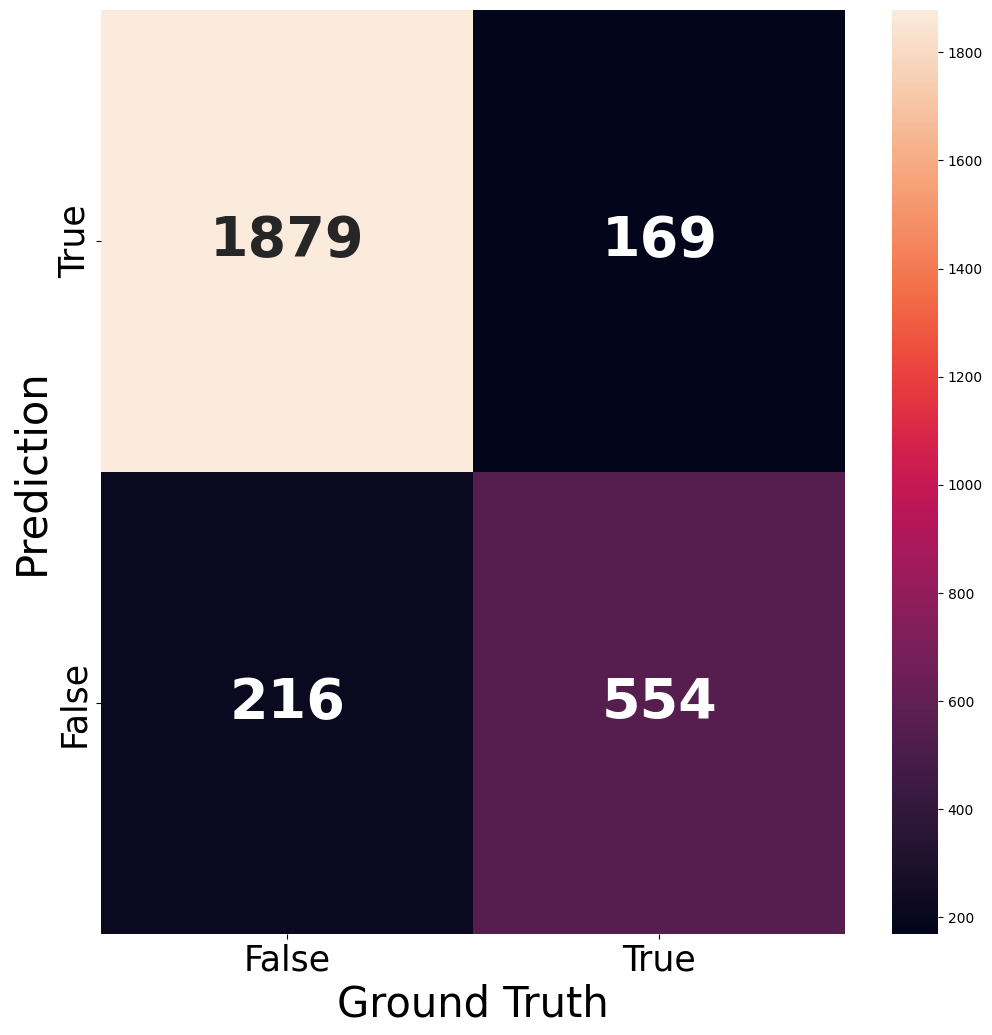

In [32]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)


## 5. Re-Train the Model (K=5)
* Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
* This time, use K=5 and weight the results by distance.
* Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.


In [33]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2048
           1       0.78      0.74      0.76       770

    accuracy                           0.87      2818
   macro avg       0.84      0.83      0.84      2818
weighted avg       0.87      0.87      0.87      2818

Accuracy score:  0.87
F1 Score:  0.76


###Explaining the model performance based on the Classification

---
The classification report provides valuable information about the performance of the model for each class and overall. Let's interpret the report based on the provided metrics:


---


**Precision =True Positives / (True Positives + False Positives)**

Precision measures how many of the predicted positive instances are actually true positives.

In this case, the precision for **class 0** is **0.91, which means that 91% of the instances predicted as class 0 are indeed true negatives.**

For **class 1**, **the precision is 0.78, indicating that 78% of the instances predicted as class 1 are true positives.**


---
**Recall = True Positives / (True Positives + False Negatives)**

Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that are correctly identified by the model.

For **class 0**, **the recall is 0.92, meaning that 92% of the actual class 0 instances are correctly identified**.

For **class 1, the recall is 0.74, indicating that 74% of the actual class 1 instances are correctly identified.**



---

**F1-score = 2 * (Precision * Recall) / (Precision + Recall)**

The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

For **class 0, the F1-score is 0.91, indicating a good balance between precision and recall.**

For **class 1, the F1-score is 0.76, suggesting a slightly lower balance between precision and recall**.



---



**Support represents the number of occurrences of each class in the dataset**

Support represents the number of occurrences of each class in the dataset. **In this case, there are 2,048 instances of class 0 and 770 instances of class 1.**


---


**Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)**

Accuracy measures the overall correct prediction rate of the model. In this report, **the accuracy is 0.87, indicating that the model correctly predicts the class of 87% of the instances.**


---


---

**Based on these metrics, we can conclude that the model performs reasonably well. It achieves high precision and recall for class 0 (the majority class), suggesting that it effectively identifies true negatives.**

**However, for class 1 (the minority class), the precision and recall are slightly lower, indicating some difficulty in correctly identifying true positives.**

The F1-score provides an overall measure of the model's performance, which is 0.76 for class 1, indicating a moderate balance between precision and recall.

The accuracy score of 0.87 suggests that the model performs well in classifying both classes, considering the overall correct prediction rate.

However, it's important to note that the interpretation of the results should consider the specific context and requirements of the problem at hand, as well as the class distribution and any potential costs or implications of misclassifications.

#6. Plotting the Metrics

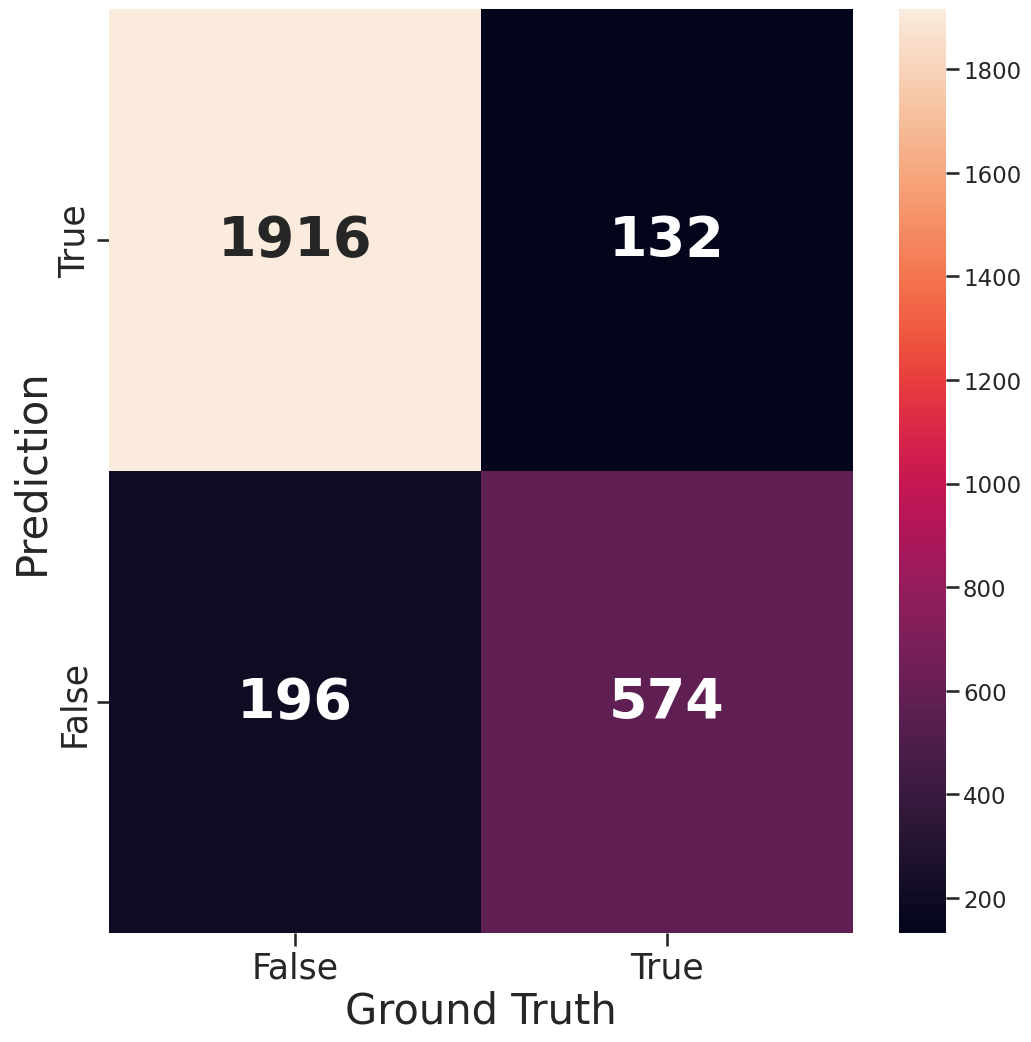

In [41]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);

ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30);


**The code snippet provided utilizes the seaborn library to create a heatmap visualization of the confusion matrix. Here's a breakdown of the code:**


---

**_, ax = plt.subplots(figsize=(12,12))**

This line creates a figure and an axes object for plotting the heatmap. The figsize parameter sets the size of the figure to 12x12 inches.

**ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})**

This line generates the heatmap using sns.heatmap. It takes the confusion matrix as input, which is computed using confusion_matrix(y_test, y_pred).

The **annot=True** argument enables the display of annotations (values) in each cell of the heatmap.

**fmt='d'**

This parameter specifies that the values should be displayed as integers.

**annot_kws={"size": 40, "weight": "bold"}**

This argument sets the annotation's font size to 40 and font weight to "bold".


---


**labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)**

These lines set the tick labels (x-axis and y-axis) for the heatmap.

The **set_xticklabels and set_yticklabels methods** are used to set the tick labels on the x-axis and y-axis, respectively.

The **labels list** contains the desired tick labels. The fontsize parameter sets the font size of the tick labels.

**In a heatmap plot in Python, tick labels refer to the labels placed on the axes to mark specific positions or intervals**.

In the context of a heatmap, tick labels are usually used to represent the categories or values being visualized.

For example, in the code snippet you provided:

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)

Here, set_xticklabels and set_yticklabels are used to set the tick labels on the x-axis and y-axis, respectively. The labels list contains the desired tick labels.

In a heatmap, tick labels are often used to represent the categories or values of the variables being displayed in the heatmap.

For instance, if you are visualizing a confusion matrix, the tick labels on the x-axis and y-axis could represent the different classes or categories being predicted and the true ground truth values, respectively.

Tick labels can provide additional information and make it easier to interpret the heatmap. By customizing the font size, style, and other properties of the tick labels, you can enhance the readability and visual appeal of the heatmap.
---


**ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)**

These lines set the labels for the y-axis (Prediction) and x-axis (Ground Truth) using the set_ylabel and set_xlabel methods, respectively. The fontsize parameter sets the font size of the axis labels.


---


Overall, this code generates a heatmap of the confusion matrix, with annotations displaying the counts in each cell. The x-axis represents the ground truth labels, and the y-axis represents the predicted labels. The size and style of the annotations, tick labels, and axis labels are customized for better visualization.

##7. Determine the right value of k
* To determine the right value for k, examine results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
* Generate charts which plot each of these measures as a function of K.
* What do these charts suggest about the optimal value for K?


In [43]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1 = f1_score(y_pred, y_test)

    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))

    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

f1_results
error_results

,K,Error Rate
0,1,0.1540
1,2,0.1529
2,3,0.1338
3,4,0.1302
4,5,0.1263
5,6,0.1221
6,7,0.1249
7,8,0.1210
8,9,0.1185
9,10,0.1167


**This code snippet performs k-nearest neighbors (KNN) classification for different values of k and collects the corresponding F1 scores and error rates.**


---


Here's a breakdown of the code:

**max_k = 40**

This sets the maximum value of k to 40.

**f1_scores = list()**

This creates an empty list to store the F1 scores.

**error_rates = list()**

This creates an empty list to store the error rates.

**for k in range(1, max_k):**

This loop iterates from 1 to max_k - 1, where k takes on values from 1 to 39.

**knn = KNeighborsClassifier(n_neighbors=k, weights='distance')**

This creates an instance of the KNeighborsClassifier class with k neighbors and weights set to 'distance'. **The 'distance' weighting considers closer neighbors to have a greater influence on the prediction.**

**knn = knn.fit(X_train, y_train)**

This fits the KNN classifier to the training data X_train and the corresponding target labels y_train.

**y_pred = knn.predict(X_test)**

This predicts the labels for the test data X_test using the trained KNN classifier.

**f1 = f1_score(y_pred, y_test)**

This calculates the F1 score by comparing the predicted labels y_pred with the true labels y_test.

**f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))**

This appends a tuple containing the value of k and the rounded F1 score to the f1_scores list.

**error = 1 - round(accuracy_score(y_test, y_pred), 4)**

This calculates the error rate by subtracting the rounded accuracy score from 1.

**error_rates.append((k, error))**

This appends a tuple containing the value of k and the error rate to the error_rates list.

**f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])**

This creates a DataFrame f1_results from the f1_scores list, with columns labeled 'K' and 'F1 Score'.

**error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])**

This creates a DataFrame error_results from the error_rates list, with columns labeled 'K' and 'Error Rate'.

**Overall, this code snippet performs KNN classification for different values of k, stores the corresponding F1 scores and error rates in separate lists, and then creates DataFrames f1_results and error_results to summarize the results.**

These DataFrames can be used for further analysis or visualization of the performance of the KNN classifier for different values of k.

<Figure size 1920x1440 with 0 Axes>

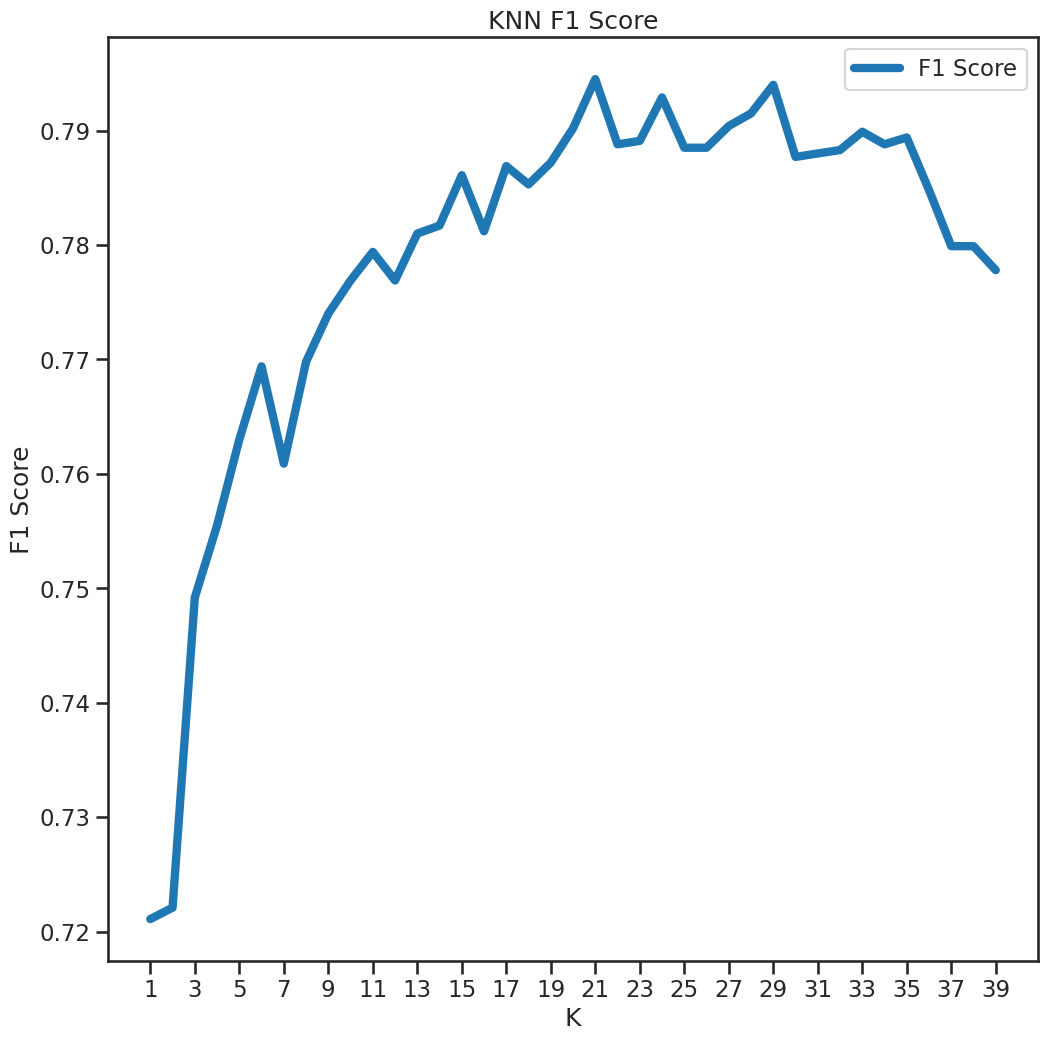

In [46]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300);
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score');
plt.savefig('knn_f1.png');

The code snippet **uses Seaborn and Matplotlib to create and save a line plot of the F1 scores obtained from the KNN classification. Here's a breakdown of the code:**

**sns.set_context('talk')**

This sets the context of the Seaborn plot to 'talk', which provides a larger font size and suitable scaling for presentation-style plots.

**sns.set_style('ticks')**

This sets the style of the Seaborn plot to 'ticks', which adds tick marks to the axes, enhancing the visibility of the plot.

**plt.figure(dpi=300)**

This creates a new figure with a dpi (dots per inch) of 300. The higher dpi value ensures a higher resolution for the saved image.

**ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)**

This sets the 'K' column of the f1_results DataFrame as the index and plots the F1 scores against the index values. It creates an Axes object assigned to the variable ax. The figsize parameter sets the size of the plot to 12x12 inches, and linewidth controls the thickness of the line.

**ax.set(xlabel='K', ylabel='F1 Score')**

This sets the labels for the x-axis and y-axis of the plot.

**ax.set_xticks(range(1, max_k, 2))**

This sets the x-axis tick locations at every other value from 1 to max_k - 1. This ensures that the x-axis ticks are not too cluttered.

**plt.title('KNN F1 Score')**

This sets the title of the plot to 'KNN F1 Score'.

**plt.savefig('knn_f1.png')**

This saves the plot as an image file named 'knn_f1.png'. The plot will be saved with the specified dpi value.

The code snippet combines the formatting capabilities of Seaborn and Matplotlib to create a visually appealing plot of the KNN F1 scores. The resulting plot is saved as a high-resolution image file for further use or presentation purposes.

##8. Plot the Accuracy & Error Results

<Figure size 1920x1440 with 0 Axes>

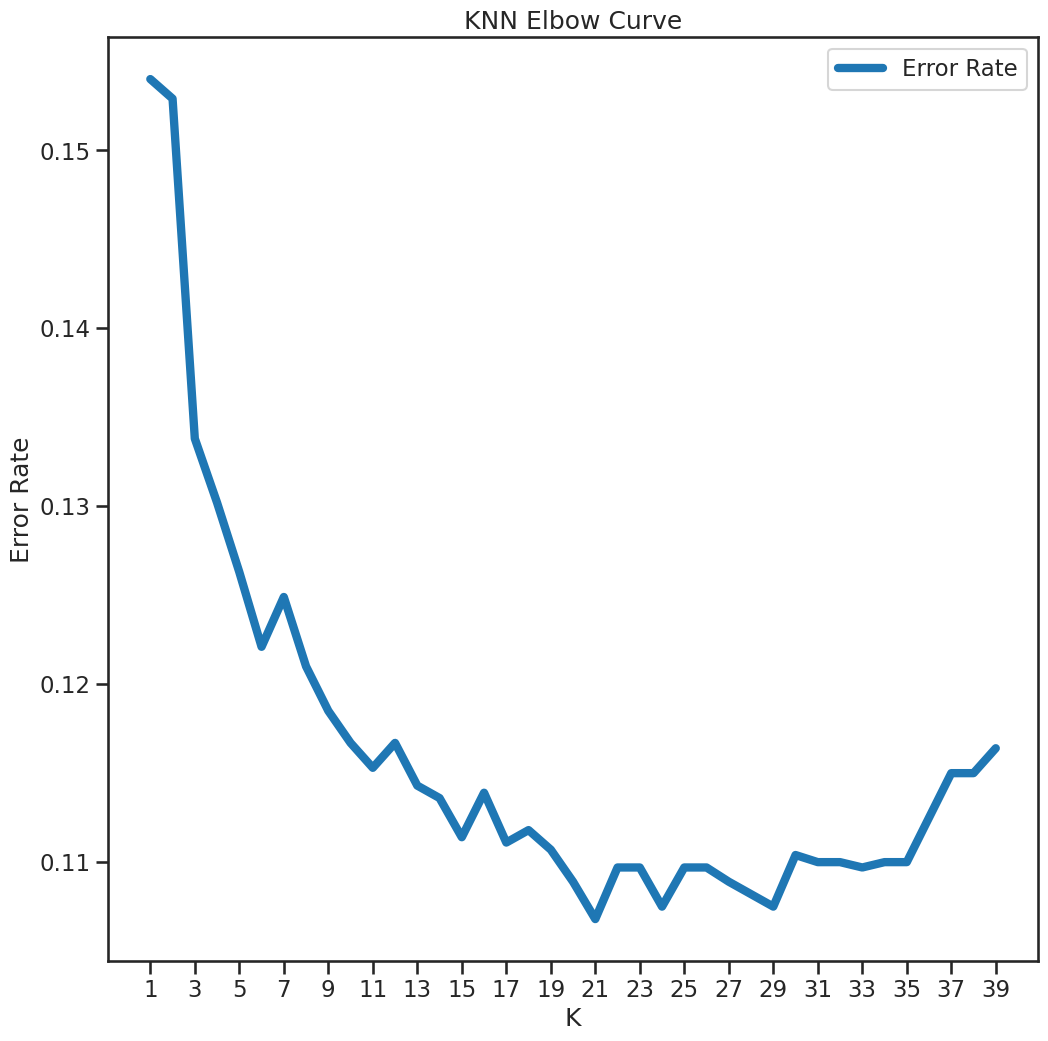

In [37]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')


**The updated code snippet uses Seaborn and Matplotlib to create and save a line plot of the error rates obtained from the KNN classification.** Here's the breakdown of the code:

**sns.set_context('talk') and sns.set_style('ticks')**

These lines set the context and style of the Seaborn plot, similar to the previous code snippet.

**plt.figure(dpi=300)**

This creates a new figure with a dpi of 300 for high-resolution output.

**ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)**

This sets the 'K' column of the error_results DataFrame as the index and plots the error rates against the index values. The resulting plot is assigned to the ax variable. The figsize parameter specifies the size of the plot as 12x12 inches, and **linewidth** controls the thickness of the line.

**ax.set(xlabel='K', ylabel='Error Rate')**

This sets the labels for the x-axis and y-axis of the plot.

**ax.set_xticks(range(1, max_k, 2))**

This sets the x-axis tick locations at every other value from 1 to max_k - 1.

**plt.title('KNN Elbow Curve')**

This sets the title of the plot as 'KNN Elbow Curve'.

**plt.savefig('knn_elbow.png')**

This saves the plot as an image file named 'knn_elbow.png' with the specified dpi value.

The updated code generates a line plot of the KNN error rates and saves it as an image file. The resulting plot can be used to analyze the trend of the error rates for different values of k, aiding in the determination of an appropriate value for k in KNN classification.

##9. Review the KNN model parameters

In [47]:
# Get the parameters of the KNN model
params = knn.get_params()

# Print the parameters
for param, value in params.items():
    print(param, "=", value)

algorithm = auto
leaf_size = 30
metric = minkowski
metric_params = None
n_jobs = None
n_neighbors = 39
p = 2
weights = distance



###KNN model parameters explanation

**algorithm = auto**

This parameter determines the algorithm used to compute the nearest neighbors. The value "auto" allows the algorithm to automatically choose the most appropriate algorithm based on the input data and other specified parameters.


---


**leaf_size = 30**

The leaf size parameter controls the leaf size of the KD tree or Ball tree data structures used for efficient neighbor searches. A smaller leaf size can lead to faster search times but may require more memory. The default value is 30.

The leaf size parameter controls the leaf size of the KD tree or Ball tree data structures used for efficient neighbor searches. A smaller leaf size can lead to faster search times but may require more memory. The default value is 30.

The leaf size parameter in the KNN model controls the leaf size of the KD tree or Ball tree data structures used for efficient neighbor searches.

In the KNN algorithm, the KD tree and Ball tree are data structures used to organize the training data for efficient nearest neighbor searches. These data structures divide the feature space into partitions or regions, allowing for faster search times during prediction.

The leaf size refers to the maximum number of points that can be stored in a leaf node of the tree. When performing a nearest neighbor search, the tree traversal stops when it reaches a leaf node.

A smaller leaf size generally leads to faster search times because there are fewer points to consider within each leaf node. However, using a smaller leaf size may require more memory because more leaf nodes are needed to store the same number of points.

The default value of 30 is a reasonable compromise between search efficiency and memory usage. However, depending on the characteristics of the dataset and the specific requirements of your application, you can experiment with different leaf sizes to find the optimal balance between search speed and memory usage.


---


**metric = minkowski**

The metric parameter defines the distance metric used for calculating distances between instances.

In this case, the "minkowski" distance metric is used, which is a generalization of other distance metrics such as Euclidean distance and Manhattan distance. The specific type of minkowski distance used can be further controlled by the p parameter.

The "minkowski" distance is a generalization of other distance metrics, such as the Euclidean distance and the Manhattan distance. It is a distance measure used in various machine learning algorithms, including k-nearest neighbors (KNN).

The minkowski distance between two points, denoted as x and y, in a feature space is calculated as:

D(x, y) = (Σ(|xi - yi|^p))^(1/p)

Here, xi and yi are the corresponding feature values of x and y, and p is a parameter that determines the type of minkowski distance:

When p is set to 1, the minkowski distance is equivalent to the Manhattan distance. It measures the sum of the absolute differences between the feature values along each dimension.

When p is set to 2, the minkowski distance is equivalent to the Euclidean distance. It measures the straight-line distance between the points in the feature space.

For values of p other than 1 or 2, the minkowski distance is a generalized metric that includes both Manhattan and Euclidean distances.

In the context of the KNN algorithm, the minkowski distance is commonly used to measure the similarity or dissimilarity between instances. It determines the nearest neighbors based on the distance between their feature values in the feature space. By setting the metric parameter of the KNN model to "minkowski", you instruct the model to use the minkowski distance for computing distances between instances during the nearest neighbor search.


---



**metric_params = None**

This parameter allows you to pass additional parameters to the distance metric function specified by the metric parameter. In this case, no additional parameters are provided.

In the context of the p parameter for the Minkowski distance, here's a further explanation:

The p parameter in the Minkowski distance formula controls the type of Minkowski distance used. It determines the exponent used in the distance calculation. The Minkowski distance formula is as follows:

D(x, y) = (Σ(|xi - yi|^p))^(1/p)

In this formula, xi and yi represent the corresponding feature values of two data points x and y. The parameter p specifies the power to which the absolute differences are raised before taking the sum and the p-th root of the sum. It defines the type of Minkowski distance used:

When p = 1, the Minkowski distance is equivalent to the Manhattan distance. It measures the sum of the absolute differences between the feature values along each dimension.
When p = 2, the Minkowski distance is equivalent to the Euclidean distance. It measures the straight-line distance between the points in the feature space.

For values of p other than 1 or 2, the Minkowski distance is a generalized metric that includes both Manhattan and Euclidean distances.
By setting p = 2, the Minkowski distance becomes the Euclidean distance, which is commonly used as a default value for the p parameter. However, you can choose different values for p based on the specific requirements of your problem or the characteristics of your data.

In summary, the p parameter in the Minkowski distance formula controls the type of Minkowski distance used, where p = 1 corresponds to the Manhattan distance, p = 2 corresponds to the Euclidean distance, and other values of p provide a generalized Minkowski distance.

---
**n_jobs = None**

The n_jobs parameter controls the number of parallel jobs to use for the neighbor search process. A value of None means that the search will be performed using a single CPU core. If set to -1, the search will be parallelized across all available CPU cores.



---



**n_neighbors = 39**

The n_neighbors parameter specifies the number of neighbors to consider when making predictions.

In this case, the model will consider 39 nearest neighbors for classification or regression tasks.


---


**p = 2**

The p parameter determines the power parameter for the Minkowski distance metric.

When p=2, it corresponds to the Euclidean distance, while p=1 corresponds to the Manhattan distance.

**weights = distance**

The weights parameter controls the weight assigned to each neighbor during prediction. In this case, the "distance" weight is used, meaning that closer neighbors will have more influence on the prediction. Alternatively, you can use "uniform" weights, where all neighbors have equal influence.



---



These parameters collectively define the behavior of the KNN model, specifying the algorithm, distance metric, number of neighbors, and other settings that impact the neighbor search process and prediction.


---
### Dr. Petros Panagiotidis